Task-2: Movie Rating Prediction by Surya Teja Nagamalla.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

df=pd.read_csv('IMDb Movies India.csv',encoding='iso-8859-1')
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:


df.shape

(15509, 10)

In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:
#checking for duplicates
df.duplicated(subset=['Name']).sum()


274

In [ ]:
df.drop_duplicates(subset='Name',inplace=True)

In [ ]:
df.describe(include='object')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5385,5385,5385,5385,5385,5385,5385,5385,5385
unique,5385,91,173,370,1957,2389,1916,2276,2495
top,#Gadhvi (He thought he was Gandhi),(2019),120 min,Drama,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,1,220,161,810,86,37,96,48,53


In [ ]:
#cleaning the data
#converting year, votes, duration to integer type, since they come under numerical data.
df['Year']=df['Year'].str.strip('()').astype(int)
df['Votes']=df['Votes'].str.replace(',','').astype(int)
df['Duration']=df['Duration'].str.strip('min').astype(int)
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

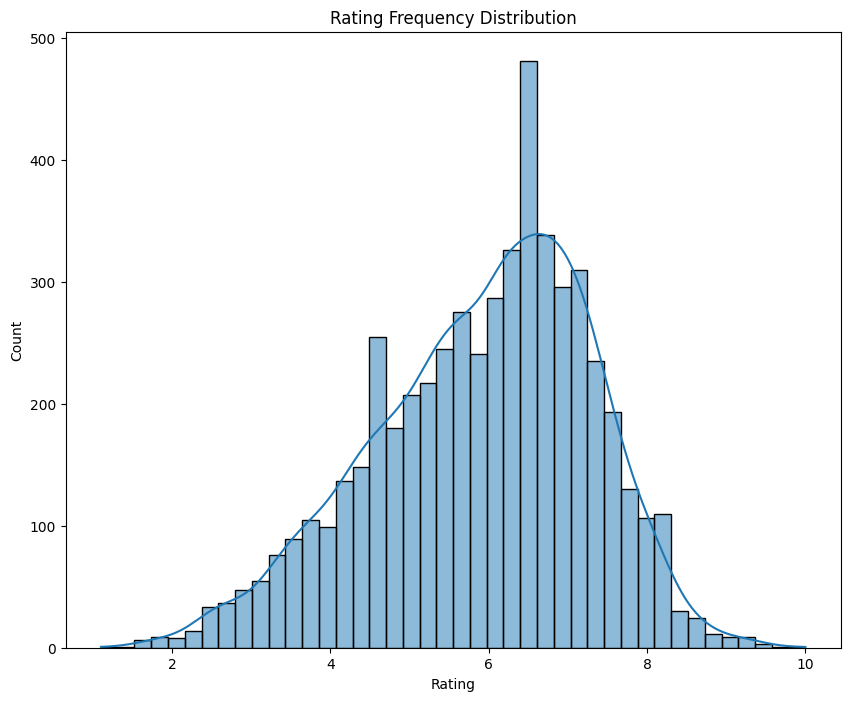

In [ ]:
#Exploratory Data Analysis
#How does rating vary?
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.histplot(x='Rating', data=df,kde=True)
plt.title('Rating Frequency Distribution')
plt.xlabel('Rating')
plt.show()



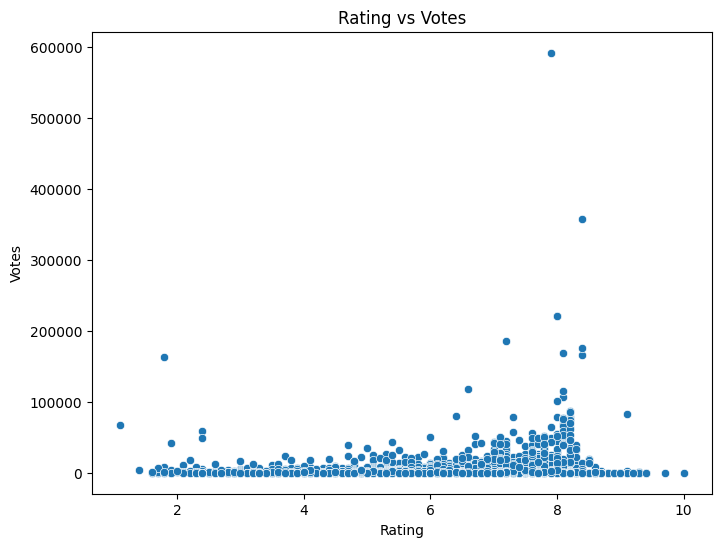

In [ ]:
#Does Voting affect rating?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Votes', data=df)
plt.title('Rating vs Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

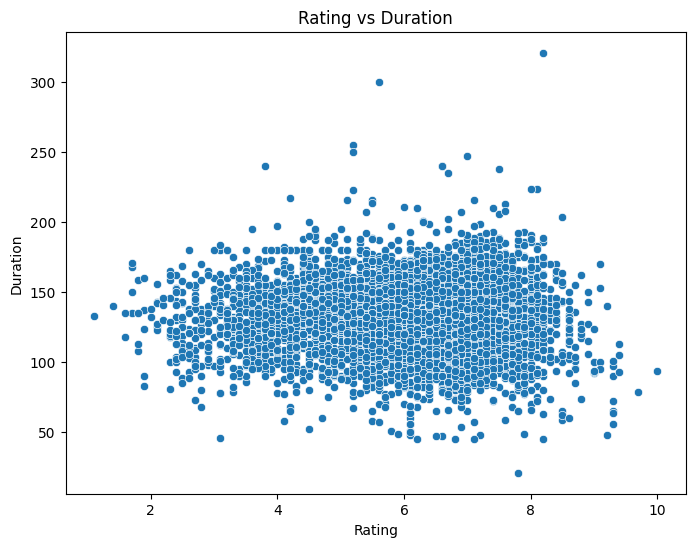

In [ ]:
#Does duration affect rating?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Duration', data=df)
plt.title('Rating vs Duration')
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.show()

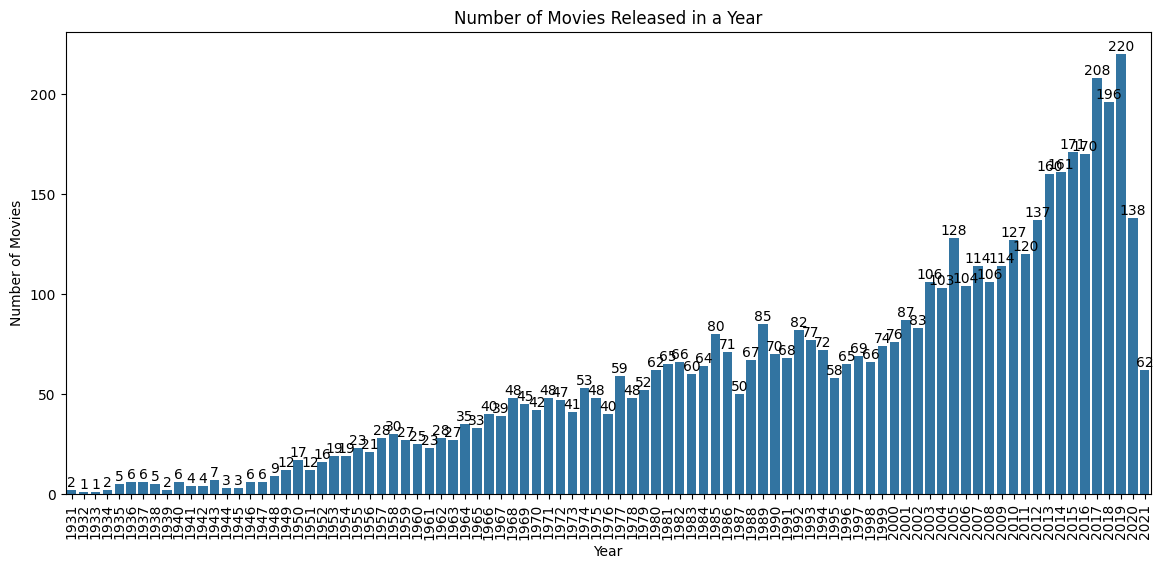

In [ ]:
#number of movies released in each year
plt.figure(figsize=(14, 6))
ax=sns.countplot(x='Year', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.title('Number of Movies Released in a Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

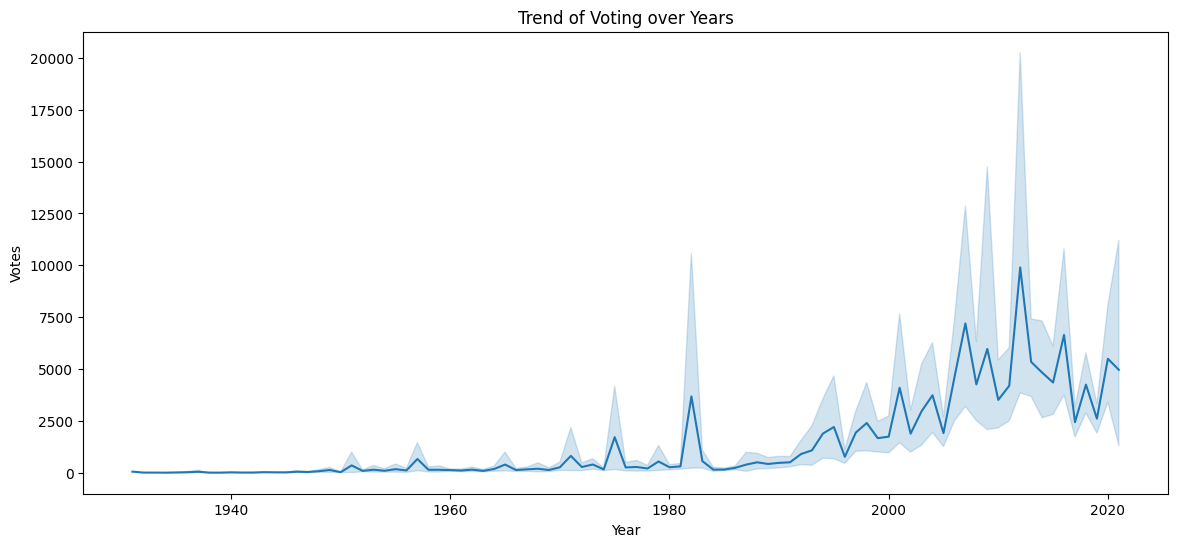

In [ ]:
#Trend of voting over years
#Seems like after 2000 and mid 2020, peoples opinionon movies has increased mostly through voting
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Votes', data=df)
plt.title('Trend of Voting over Years')
plt.xlabel('Year')
plt.ylabel('Votes')
plt.show()

In [ ]:
#who are the top directors based on rating
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Arvind Pratap        9.4
Suhrud Godbole       9.4
Munni Pankaj         9.4
                    ... 
Stanley D'Costa      1.8
Raajeev Walia        1.8
Pramod Mandloi       1.7
Chakri Toleti        1.6
Sachindra Sharma     1.6
Name: Rating, Length: 2389, dtype: float64

In [ ]:
#which genre has more rating(I would like to show top 10)
rating_genre=df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
rating_genre.head(10)

Genre
History, Romance                   9.40
Documentary, Family, History       9.30
Documentary, Music                 8.90
Documentary, Thriller              8.70
Documentary, Sport                 8.60
Biography, Family                  8.30
Animation, Comedy, Family          8.30
Music, Romance                     8.25
Documentary, Biography, Musical    8.20
Drama, Musical, Sport              8.10
Name: Rating, dtype: float64

In [ ]:
#top 5 rated movies and its corresponding director
df.sort_values(by='Rating',ascending=False)[['Name','Director']].head()

,Name,Director
8339,Love Qubool Hai,Saif Ali Sayeed
5410,Half Songs,Sriram Raja
5077,Gho Gho Rani,Munni Pankaj
6852,June,Suhrud Godbole
14222,The Reluctant Crime,Arvind Pratap


In [ ]:
#Directors with most directed movies-top 5
df['Director'].value_counts().head()

Director
David Dhawan            37
Mahesh Bhatt            34
Hrishikesh Mukherjee    33
Shakti Samanta          32
Ram Gopal Varma         31
Name: count, dtype: int64

In [ ]:
#Data Preperation
#Encoding categorical variables with target encoding by mean
df.drop('Name',axis=1)              #Felt name of movie doesn't impact on rating

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:

#Encoding categorical variables with target encoding by mean
df['Encoded_genre']=df.groupby('Genre')['Rating'].transform('mean')
df['Encoded_Director']=df.groupby('Director')['Rating'].transform('mean')
df['Encoded_Votes']=df.groupby('Votes')['Rating'].transform('mean')
df['Encoded_Actor 1']=df.groupby('Actor 1')['Rating'].transform('mean')
df['Encoded_Actor 2']=df.groupby('Actor 2')['Rating'].transform('mean')
df['Encoded_Actor 3']=df.groupby('Actor 3')['Rating'].transform('mean')
df.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Encoded_genre', 'Encoded_Director',
       'Encoded_Votes', 'Encoded_Actor 1', 'Encoded_Actor 2',
       'Encoded_Actor 3'],
      dtype='object')

In [ ]:
df.drop(columns=['Name','Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)

<Axes: >

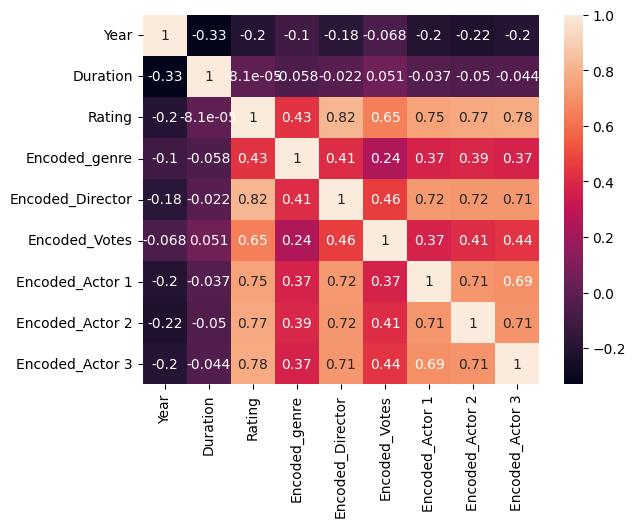

In [ ]:
corl=df.corr()
sns.heatmap(corl,annot=True)

<Axes: xlabel='Rating', ylabel='Encoded_Director'>

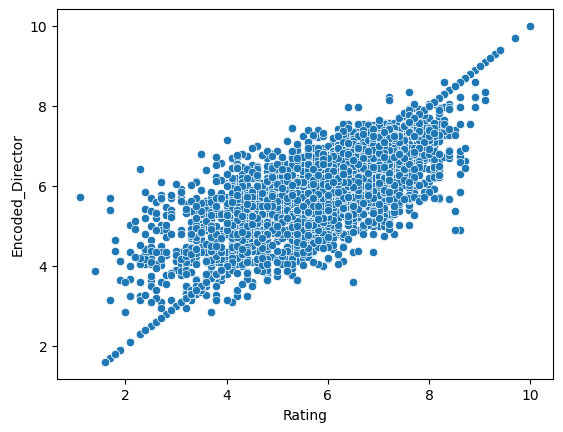

In [ ]:
#Showing relation  between rating and director
sns.scatterplot(x='Rating',y='Encoded_Director',data=df)

<Axes: xlabel='Rating', ylabel='Encoded_Votes'>

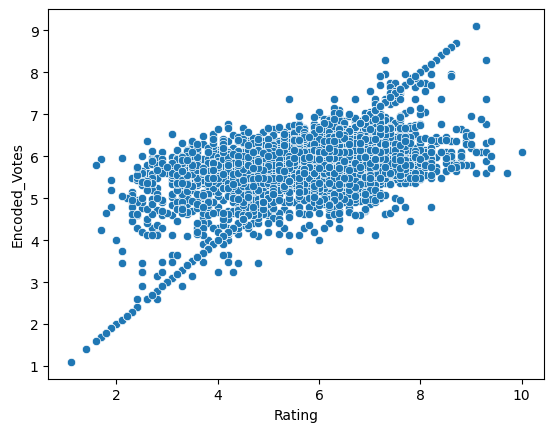

In [ ]:
#Showing relation  between rating and Encoded votes
sns.scatterplot(x='Rating',y='Encoded_Votes',data=df)

In [ ]:
#Since year and duration have very low impact or correlation with rating, I am dropping year and duration
df.drop(columns=['Year','Duration'],axis=1,inplace=True)

In [ ]:
#Splitting data
from sklearn.model_selection import train_test_split

X=df.drop('Rating',axis=1)
Y=df['Rating']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.head()

,Encoded_genre,Encoded_Director,Encoded_Votes,Encoded_Actor 1,Encoded_Actor 2,Encoded_Actor 3
4573,6.422222,6.550000,7.100000,4.850000,7.100000,6.900000
2050,6.020065,5.683333,6.126316,6.605714,5.563636,5.644444
14979,5.711538,6.350000,5.437500,4.500000,4.500000,4.500000
7469,5.772039,6.600000,5.935714,6.920000,5.785185,5.600000
15061,6.422222,6.800000,6.800000,6.800000,6.800000,6.333333


In [ ]:
##Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

LG=LinearRegression().fit(X_train,Y_train)
y_pred=LG.predict(X_test)

MSE=mean_squared_error(Y_test,y_pred)
print('The mean squared error (MSE) obtained for Linear Regressor is:',MSE)

R2=r2_score(Y_test,y_pred)
print('The R-squared value of the Linear Regressor is:',R2)

The mean squared error (MSE) obtained for Linear Regressor is: 0.3012553027053215
The R-squared value of the Linear Regressor is: 0.8397991515886021


In [ ]:
#Implementing Random Forrest Regressor

from sklearn.ensemble import RandomForestRegressor

RFG=RandomForestRegressor().fit(X_train,Y_train)
y_pred=RFG.predict(X_test)

MSE=mean_squared_error(Y_test,y_pred)
print('The mean squared error (MSE) Random Forrest Regressor is:',MSE)

R2=r2_score(Y_test,y_pred)
print('The R-squared value for Random Forrest Regressor is:',R2)


The mean squared error (MSE) Random Forrest Regressor is: 0.2385817168059425
The R-squared value for Random Forrest Regressor is: 0.8731275662053775


In [ ]:
#Implementing XGB Regressor
from xgboost import XGBRegressor
XGB=XGBRegressor().fit(X_train,Y_train)
y_pred=XGB.predict(X_test)

MSE=mean_squared_error(Y_test,y_pred)
print('The mean squared error (MSE) for XGB Regressor is:',MSE)

R2=r2_score(Y_test,y_pred)
print('The R-squared value for XGboost Regressor is:',R2)




The mean squared error (MSE) for XGB Regressor is: 0.2780604416522767
The R-squared value for XGboost Regressor is: 0.85213366117603
